In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes as dscrt
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [2]:
df = pd.read_csv("Sexual_Assault_Data.csv")
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,571533282,12/31/18,17:05:00,12/31/18,17:15:00,10,12/31/18,233,SEX CRIMES,175,...,M,NaN,40.742699,-73.998655,"(40.742699299, -73.99865538)",PATROL BORO MAN SOUTH,NaN,<18,WHITE,M
1,820453504,12/31/18,15:35:00,12/31/18,15:40:00,40,12/31/18,233,SEX CRIMES,175,...,NaN,NaN,40.810396,-73.925311,"(40.810396019, -73.925310745)",PATROL BORO BRONX,NaN,25-44,WHITE HISPANIC,F
2,113940766,12/31/18,4:30:00,12/31/18,4:50:00,49,12/31/18,233,SEX CRIMES,175,...,M,NaN,40.856163,-73.844397,"(40.856162957, -73.844397124)",PATROL BORO BRONX,NaN,18-24,WHITE HISPANIC,F
3,817554319,12/30/18,3:30:00,12/30/18,3:45:00,34,12/30/18,233,SEX CRIMES,175,...,M,3.0,40.851488,-73.935458,"(40.851487774, -73.935457967)",PATROL BORO MAN NORTH,207 ST.-INWOOD,25-44,UNKNOWN,M
4,726764710,12/30/18,18:45:00,12/30/18,19:00:00,120,12/30/18,233,SEX CRIMES,175,...,NaN,NaN,40.644726,-74.077483,"(40.644726131, -74.077483159)",PATROL BORO STATEN ISLAND,NaN,25-44,ASIAN / PACIFIC ISLANDER,F


In [3]:
lats = df["Latitude"]
lons = df["Longitude"]
print("")

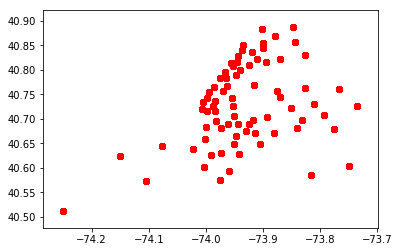

In [4]:
plt.scatter(lons, lats, marker = 'o', color='r', zorder=5)

In [5]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

street_map = gpd.read_file('Borough Boundaries/geo_export_b3653097-105d-457d-9e40-588fe6f430dc.shp')

In [6]:
crs = {'init':'espc:4326'}

geometry = [Point(xy) for xy in zip(df["Longitude"], df["Latitude"])]

geo_df = gpd.GeoDataFrame(df,
 crs = crs,
 geometry = geometry)

In [7]:
geo_df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,geometry
0,571533282,12/31/18,17:05:00,12/31/18,17:15:00,10,12/31/18,233,SEX CRIMES,175,...,NaN,40.742699,-73.998655,"(40.742699299, -73.99865538)",PATROL BORO MAN SOUTH,NaN,<18,WHITE,M,POINT (-73.99865538 40.7426993)
1,820453504,12/31/18,15:35:00,12/31/18,15:40:00,40,12/31/18,233,SEX CRIMES,175,...,NaN,40.810396,-73.925311,"(40.810396019, -73.925310745)",PATROL BORO BRONX,NaN,25-44,WHITE HISPANIC,F,POINT (-73.92531074 40.81039602)
2,113940766,12/31/18,4:30:00,12/31/18,4:50:00,49,12/31/18,233,SEX CRIMES,175,...,NaN,40.856163,-73.844397,"(40.856162957, -73.844397124)",PATROL BORO BRONX,NaN,18-24,WHITE HISPANIC,F,POINT (-73.84439712 40.85616296)
3,817554319,12/30/18,3:30:00,12/30/18,3:45:00,34,12/30/18,233,SEX CRIMES,175,...,3.0,40.851488,-73.935458,"(40.851487774, -73.935457967)",PATROL BORO MAN NORTH,207 ST.-INWOOD,25-44,UNKNOWN,M,POINT (-73.93545797 40.85148777)
4,726764710,12/30/18,18:45:00,12/30/18,19:00:00,120,12/30/18,233,SEX CRIMES,175,...,NaN,40.644726,-74.077483,"(40.644726131, -74.077483159)",PATROL BORO STATEN ISLAND,NaN,25-44,ASIAN / PACIFIC ISLANDER,F,POINT (-74.07748316 40.64472613)


In [8]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

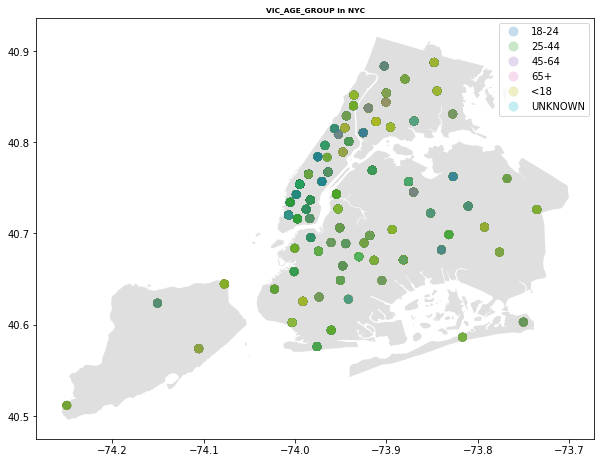

In [50]:
consize = 10
fig, ax = plt.subplots(figsize=(consize,consize))

street_map.plot(ax=ax, alpha=0.25, color='grey')


column="VIC_AGE_GROUP"
geo_df.plot(column, ax=ax,alpha=0.25, legend=True, markersize=consize*6)
#plt.legend(fontsize=10)
#plt.legend(loc="upper left")

plt.title(str(column)+" in NYC", fontsize=consize*0.75, fontweight='bold')

#plt.xlim(-74.02,-73.925)
#plt.ylim( 40.7,40.8)

plt.show()

In [14]:
import plotly.graph_objects as go

#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
#df['dftext'] = df['CMPLNT_NUM'] + '' + df['Latitude'] + ', ' + df['Longitude'] + '' + 'Arrivals: ' + df['STATION_NAME'].astype(str)

#fig = go.Figure(data=go.Scattergeo(
 #       lon = df['Longitude'],
  #      lat = df['Latitude'],
   #     text = df['dftext'],
    #    mode = 'markers',
     #   ))

#fig.update_layout(
 #       title = 'Most trafficked US airports<br>(Hover for airport names)'
  #      geo_scope='new york',
   # )
#fig.show()

In [16]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

#plt.hist(df["BORO_NM"])
#plt.ylabel('Probability');

Text(0.5,1,'Sexual Assault Freq in NYC')

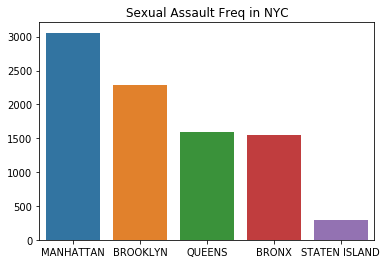

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

dfcount = df["BORO_NM"].value_counts()
#borolist = list(dict.fromkeys(list(df["BORO_NM"])))
#borolist = [x for x in borolist if str(x) != 'nan']
#borolist.sort()
graph = sns.barplot(x=dfcount.keys(), y=list(dfcount))
plt.title("Sexual Assault Freq in NYC")

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt

fig = plt.hist(pd["BORO_NM"], #x="total_bill",
                   title='Histogram of bills',
                   labels={'total_bill':'total bill'}, # can specify one label per df column
                   opacity=0.8,
                   log_y=True, # represent bars with log scale
                   color_discrete_sequence=['indianred'] # color of histogram bars
                   )
fig.show()

In [ ]:
plt.hist(x, 20,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.show()